# **Mathematical Tools for Big Data - Assignment 3**

### **Students :**
- **Alexandra de Carvalho** (93346)
- **Diogo Pedrosa** (xxxxx)
- **Roshan Poudel** (109806)

## **Common Steps**

## Reading and General data analysis

In [15]:
import pandas as pd
import numpy as np

# reading data
data = pd.read_csv("data/cash-crops-nepal.csv")
# visualize some data
data.iloc[:5,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641


In [16]:
data.shape

(105, 6)

In [17]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


In [18]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:5,:]

,Area,Production,Yield
37,129019,1313717,10182
97,12265,15545,1267
87,14450,15800,1093
45,6470,4460,689
85,47191,61102,1295


In [19]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:5,:]

,Area,Production,Yield
37,0.677518,0.552887,0.253177
97,0.064407,0.006542,0.031504
87,0.075881,0.006650,0.027178
45,0.033976,0.001877,0.017132
85,0.247814,0.025715,0.032200


## Loading SOM utils

In [6]:
from soms.som_utils import neighborhood_preservation_trustworthiness
from soms.som_utils import som_train_predict
from soms.som_utils import visualize_som

## Base SOM (SOM1)

Position : 1
SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
Position : 2
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
Position : 3
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
Position : 4
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
Position : 5
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
Position : 6
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940264
-------------------------------------
Position : 7
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  

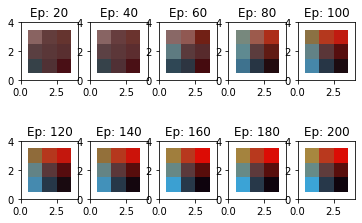

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
81,2002/2003,2059/60,SUGARCANE,60425,2343054,38776,0.317310,0.986091,0.964169,"[[0.23008457663477008, 0.6442156386602669, 0.8...","[0, 0]"
55,1997/98,2054/55,TOBACCO,4871,3845,789,0.025579,0.001618,0.019619,"[[0.059514560065217284, 0.013697085049015229, ...","[2, 0]"
24,1987/88,2044/45,POTATO,80180,566950,7071,0.421049,0.238605,0.175821,"[[0.3723031039607097, 0.23628993658977673, 0.2...","[1, 1]"
29,1992/93,2049/50,POTATO,87020,733300,8427,0.456968,0.308615,0.209538,"[[0.3723031039607097, 0.23628993658977673, 0.2...","[1, 1]"
2,1986/87,2043/44,OILSEED,142890,82500,577,0.750358,0.034721,0.014347,"[[0.8601109474327772, 0.04822908232998694, 0.0...","[2, 2]"


In [7]:
from soms.our_som1 import SOM as SOM_1_base
# som = SOM(x_size, y_size, num_features)
som_1 = SOM_1_base(3,3,3)
joined_df, clustered_df = som_train_predict(som_1, trunc_data, agri_data)
joined_df.iloc[0:5]

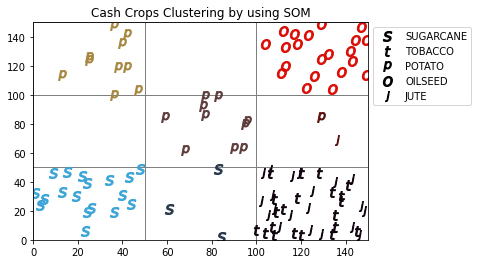

In [8]:
visualize_som(som_1, joined_df)

In [9]:
trunc_data.head()

,Area,Production,Yield
81,0.317310,0.986091,0.964169
55,0.025579,0.001618,0.019619
24,0.421049,0.238605,0.175821
29,0.456968,0.308615,0.209538
2,0.750358,0.034721,0.014347


In [20]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd.head()

,0,1,2
37,0.656554,0.529388,0.246577
97,0.059515,0.013697,0.050012
87,0.059515,0.013697,0.050012
45,0.059515,0.013697,0.050012
85,0.347320,0.055409,0.047793


## **Q1:** Which numerical criteria would you use to measure an enhancement of the algorithm?

Throughout this assignment, we will be exploring different changes to the proposed algorithm, and their impact in results. Thus, we are in need of a numerical criteria that will allow us to measure results. For this reason, we are going to use the metrics of neighbourhood preservation and trustworthiness. These measure how the projection preserves the neighborhoods present in the input space by ranking the k-nearest neighbors of each sample before and after projection. The implementation of this criteria is in `neighbourhood_preservation_trustworthiness.ipynb`.

In [12]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9672676837725381, 0.8807023650884301)

#### Q2: Write a SOM1A version, where you alter the interpolation curve of the learning factor. Can you get improvements?